## Generación de predicciones y análisis de rentabilidad

Hemos generado 10 modelos distintos y los hemos entrenado con los datos de venta. 
Ahora, generaremos predicciones del precio de venta de la vivienda sobre el dataset de alquiler. Por tanto, en el dataset de alquiler, tendremos el precio de alquiler (que ya viene dado) y el precio de venta predicho por nuestro modelo. 

De esta forma, podremos hacer una comparativa. Podremos calcular el retorno de la inversión, es decir, el precio de venta dividido entre el precio mensual por alquiler. Esto nos va a dar meses. Por tanto, x meses significará que con el alquiler de x meses nos podemos pagar el piso (el precio de venta total).

Además, haremos un análisis del retorno de la inversión: qué viviendas son más rentables en Barcelona para comprar y luego alquilar, en qué barrios, qué tamaños tienen, si tienen aire acondicionado o no, etc. 

1. Selección del mejor modelo de entre todos los calculados para predecir el precio de la vivienda: Modelo 3.1 Bagging. 
2. Preparación del dataset de alquiler de pisos.
3. Cálculo de las predicciones sobre el dataset de alquiler.
4. Cálculo de la métrica de Break-even, resultante de dividir la predicción del precio de la vivienda por el precio de alquiler por mes.

### Preparación del dataset de alquiler de pisos

Debemos preprocesar y transformar el dataset de alquiler de la misma manera que el de venta. Por tanto seguiremos los mismos pasos:  

In [450]:
# Cargamos los datos crudos del dataset de alquiler
raw_data_renting = pd.read_csv('renting_Barcelona.csv', delimiter = ',')
explore_data(raw_data_renting)

The dataset includes 8502 instances (rows) and 33 variables (columns).



,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,doorman,pool,ac,heating,year_built,quality,city,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,850,€/mes,41.401708,2.154077,52.0,55,2,1,NaN,NaN,1.0,norte,2.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2,Barcelona,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,725,€/mes,41.407221,2.135569,32.0,37,2,1,1.0,NaN,1.0,sur,3.0,NaN,1.0,NaN,NaN,1.0,NaN,1962.0,2,Barcelona,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,950,€/mes,41.411508,2.164608,NaN,72,3,1,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2,Barcelona,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,750,€/mes,41.402256,2.140764,NaN,45,1,1,1.0,NaN,1.0,norte,4.0,NaN,1.0,NaN,NaN,NaN,NaN,1936.0,2,Barcelona,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,990,€/mes,41.405327,2.146929,NaN,45,1,1,NaN,NaN,1.0,sur,3.0,NaN,1.0,NaN,NaN,NaN,gas,NaN,2,Barcelona,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8502 non-null   int64  
 1   price                 8502 non-null   int64  
 2   currency              8502 non-null   object 
 3   latitude              8502 non-null   float64
 4   longitude             8502 non-null   float64
 5   sq_meters             4967 non-null   float64
 6   sq_meters_built       8502 non-null   int64  
 7   rooms                 8502 non-null   int64  
 8   bathrooms             8502 non-null   int64  
 9   balcony               3485 non-null   float64
 10  terrace               1928 non-null   float64
 11  exterior              7836 non-null   float64
 12  orientation           3686 non-null   object 
 13  floor                 6536 non-null   float64
 14  rooftop               617 non-null    float64
 15  elevator           

,id,price,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,doorman,pool,ac,year_built,quality,dist_city_center,furniture,garage,garden,dist_closest_station
count,8.502000e+03,8502.000000,8502.000000,8502.000000,4967.000000,8502.000000,8502.000000,8502.000000,3485.0,1928.0,7836.000000,6536.000000,617.0,8245.000000,0.0,321.0,4086.0,4006.000000,8502.0,8502.000000,7250.0,385.0,51.0,8502.000000
mean,8.852101e+07,1117.482828,41.398106,2.162651,65.191464,72.478711,2.075394,1.265349,1.0,1.0,0.880041,3.062576,1.0,0.683808,NaN,1.0,1.0,1950.885921,2.0,2.616749,3.0,1.0,1.0,0.392531
std,1.781127e+07,1010.198242,0.018344,0.020805,40.805539,49.650215,1.155006,0.602056,0.0,0.0,0.324935,2.104151,0.0,0.465017,NaN,0.0,0.0,38.391917,0.0,1.409102,0.0,0.0,0.0,0.290708
min,5.366250e+05,365.000000,41.353583,2.102393,3.000000,11.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000,1.0,0.000000,NaN,1.0,1.0,1783.000000,2.0,0.062165,3.0,1.0,1.0,0.007875
25%,9.235744e+07,768.250000,41.382177,2.146160,45.000000,50.000000,1.000000,1.000000,1.0,1.0,1.000000,2.000000,1.0,0.000000,NaN,1.0,1.0,1930.000000,2.0,1.475110,3.0,1.0,1.0,0.225168
50%,9.505698e+07,850.000000,41.397202,2.164480,58.000000,63.000000,2.000000,1.000000,1.0,1.0,1.000000,3.000000,1.0,1.000000,NaN,1.0,1.0,1962.000000,2.0,2.481490,3.0,1.0,1.0,0.325357
75%,9.519903e+07,1100.000000,41.409961,2.178082,71.000000,79.000000,3.000000,1.000000,1.0,1.0,1.000000,4.000000,1.0,1.000000,NaN,1.0,1.0,1974.000000,2.0,3.589782,3.0,1.0,1.0,0.453814
max,9.589512e+07,27500.000000,41.467905,2.218582,672.000000,981.000000,11.000000,7.000000,1.0,1.0,1.000000,29.000000,1.0,1.000000,NaN,1.0,1.0,2106.000000,2.0,8.940761,3.0,1.0,1.0,3.177445



 Number of duplicates: 0


Primero, exploraremos el dataset de alquiler para poder definir, sobre todo, los diferentes grupos de las variables que hemos convertido a rangos anteriormente en el dataset de venta, como property_age_cat, floor_cat y neighborhood_rent_index_cluster. 

Una vez creados los rangos, luego los definiremos dentro de la clase DataPreprocessorRent() para automatizar el preprocesado del dataset de alquiler. 

In [451]:
# creamos el que será el dataset de alquiler preprocesado
rent_data_preprocessed = raw_data_renting.copy(deep=True)

**Edad Vivienda**

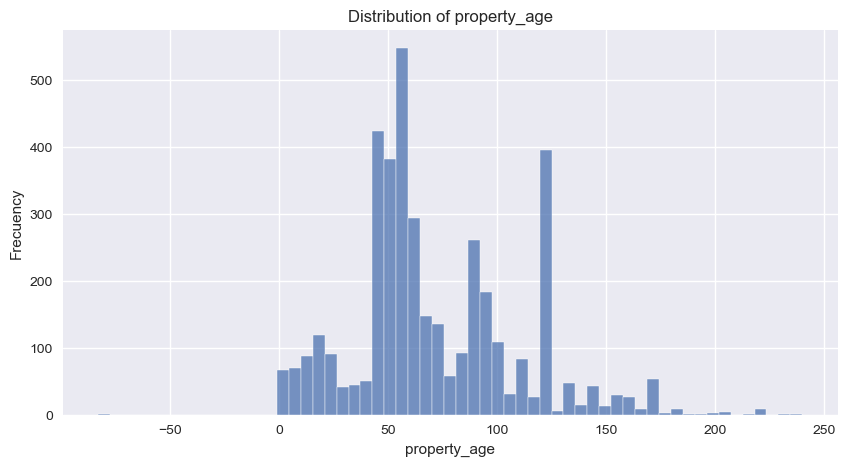

The optimal number of clusters is: 4


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


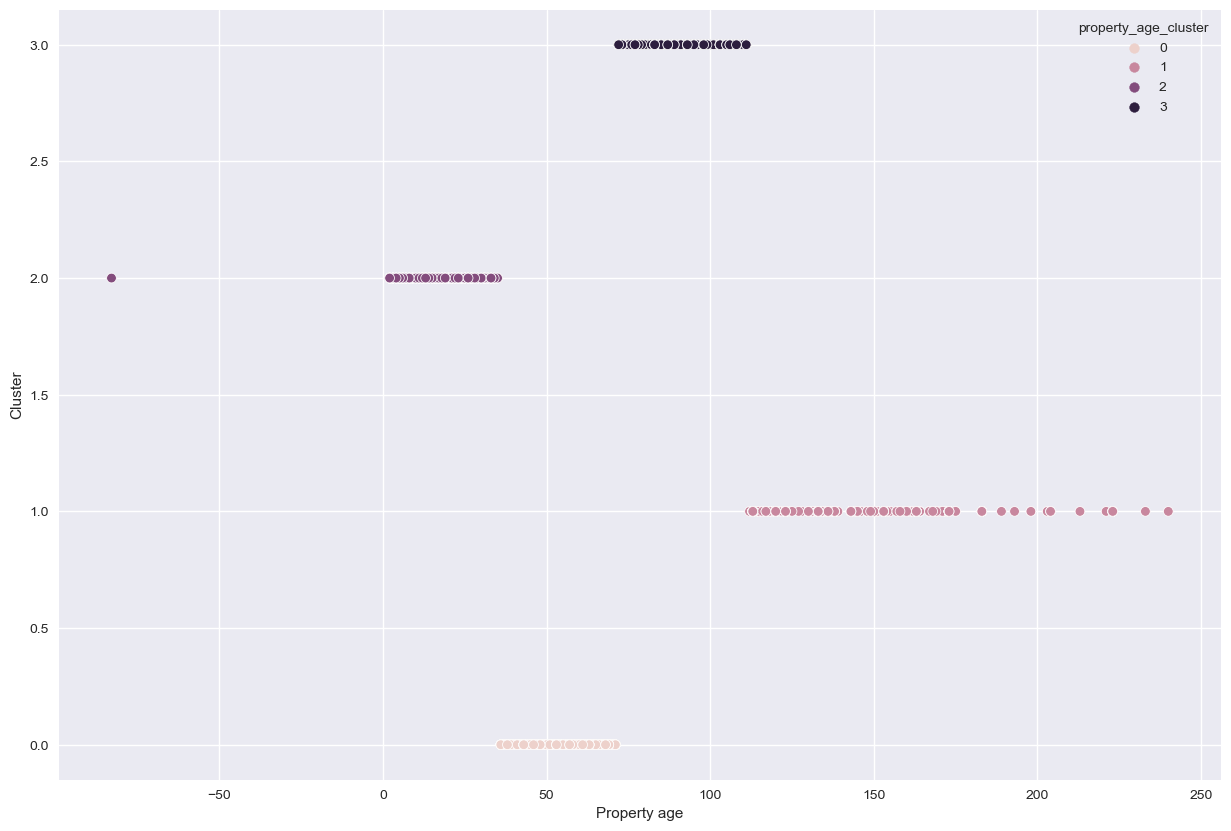

property_age_cluster property_age                                        
                                min    max        mean median    q25    q75
1                    1        112.0  240.0  134.015769  123.0  123.0  143.0
3                    3         72.0  111.0   88.756410   87.0   83.0   93.0
0                    0         36.0   71.0   54.425916   54.0   48.0   59.0
2                    2        -83.0   35.0   16.400794   17.0    8.0   23.0

In [439]:
# creamos variable 'property_age'
rent_data_preprocessed['property_age'] = 2023 - rent_data_preprocessed['year_built']

# Histograma de la variable precio
plot_histogram(rent_data_preprocessed, 'property_age')
# Create a copy
df = rent_data_preprocessed.dropna(subset=['property_age']).copy()

# Scale the property_age column using StandardScaler
X = StandardScaler().fit_transform(df['property_age'].values.reshape(-1, 1))

# Evaluate DBSCAN for range of eps values and select best_eps
eps_range = np.arange(0.1, 1.1, 0.1)
scores = [len(set(DBSCAN(eps=eps, min_samples=5).fit(X).labels_)) - (1 if -1 in DBSCAN(eps=eps, min_samples=5).fit(X).labels_ else 0) for eps in eps_range]
best_eps = eps_range[np.argmax(scores)]
# optimal number of clusters
k = len(set(DBSCAN(eps=best_eps, min_samples=5).fit(X).labels_)) - (1 if -1 in DBSCAN(eps=best_eps, min_samples=5).fit(X).labels_ else 0)
print("The optimal number of clusters is:", k)

# Perform K-means clustering on the property_age variable with the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Assign each property to a cluster based on its property age
df['property_age_cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df, x='property_age', y='property_age_cluster', hue='property_age_cluster')
plt.xlabel('Property age')
plt.ylabel('Cluster')
plt.show()


# ordenamos por el mínimo en orden descendente:
def q25(x): return x.quantile(0.25)
def q75(x): return x.quantile(0.75)

display(df.groupby('property_age_cluster', as_index=False)\
              .agg({'property_age': ['min', 'max', 'mean', 'median', q25, q75]})\
              .sort_values(('property_age', 'min'), ascending=False))


def property_age_rent_conditions(x: float) -> str:
    """
    Assigns a property age range label to a property age value.

    Parameters:
        x (float): The property age value.

    Returns:
        str: The label for the property age range that the value falls into.
    """
    if pd.isna(x):  # check for NaN values
        return "Unknown"
    elif x < 0: # viviendas dónde no tengo valores (missing values)
        return "Unknown"
    elif 0 <= x <= 35:  # entre 0 y 35 años
        return "0 - 35"
    elif 35 < x <= 71:  # entre 35 y 71 años
        return "35 - 71"
    elif 71 < x <= 111:  # entre 71 y 111 años
        return "71 - 111"
    elif x > 111:  # más de 111 años
        return "+111"
    else:
        return "Unknown"

**Floor**

,index,floor,category_count,mean_price,median_price,min_price,max_price,stantard_deviation
0,0,1.0,1621,1058.713140,850.0,375,15000,872.195510
1,1,2.0,1444,1034.605956,850.0,450,8000,657.958040
2,2,3.0,1247,1076.694467,850.0,365,11000,728.365237
3,3,4.0,967,1109.232678,850.0,480,14000,919.922265
4,4,5.0,583,1124.686106,900.0,419,7250,620.034299
5,5,6.0,298,1227.724832,942.5,550,7200,820.993341
6,6,7.0,192,1345.104167,950.0,500,8000,1027.784049
7,7,8.0,87,1079.298851,900.0,460,3500,562.091797
8,8,9.0,41,1371.560976,925.0,700,3400,746.857652
9,9,10.0,21,1122.285714,850.0,675,2500,572.837424


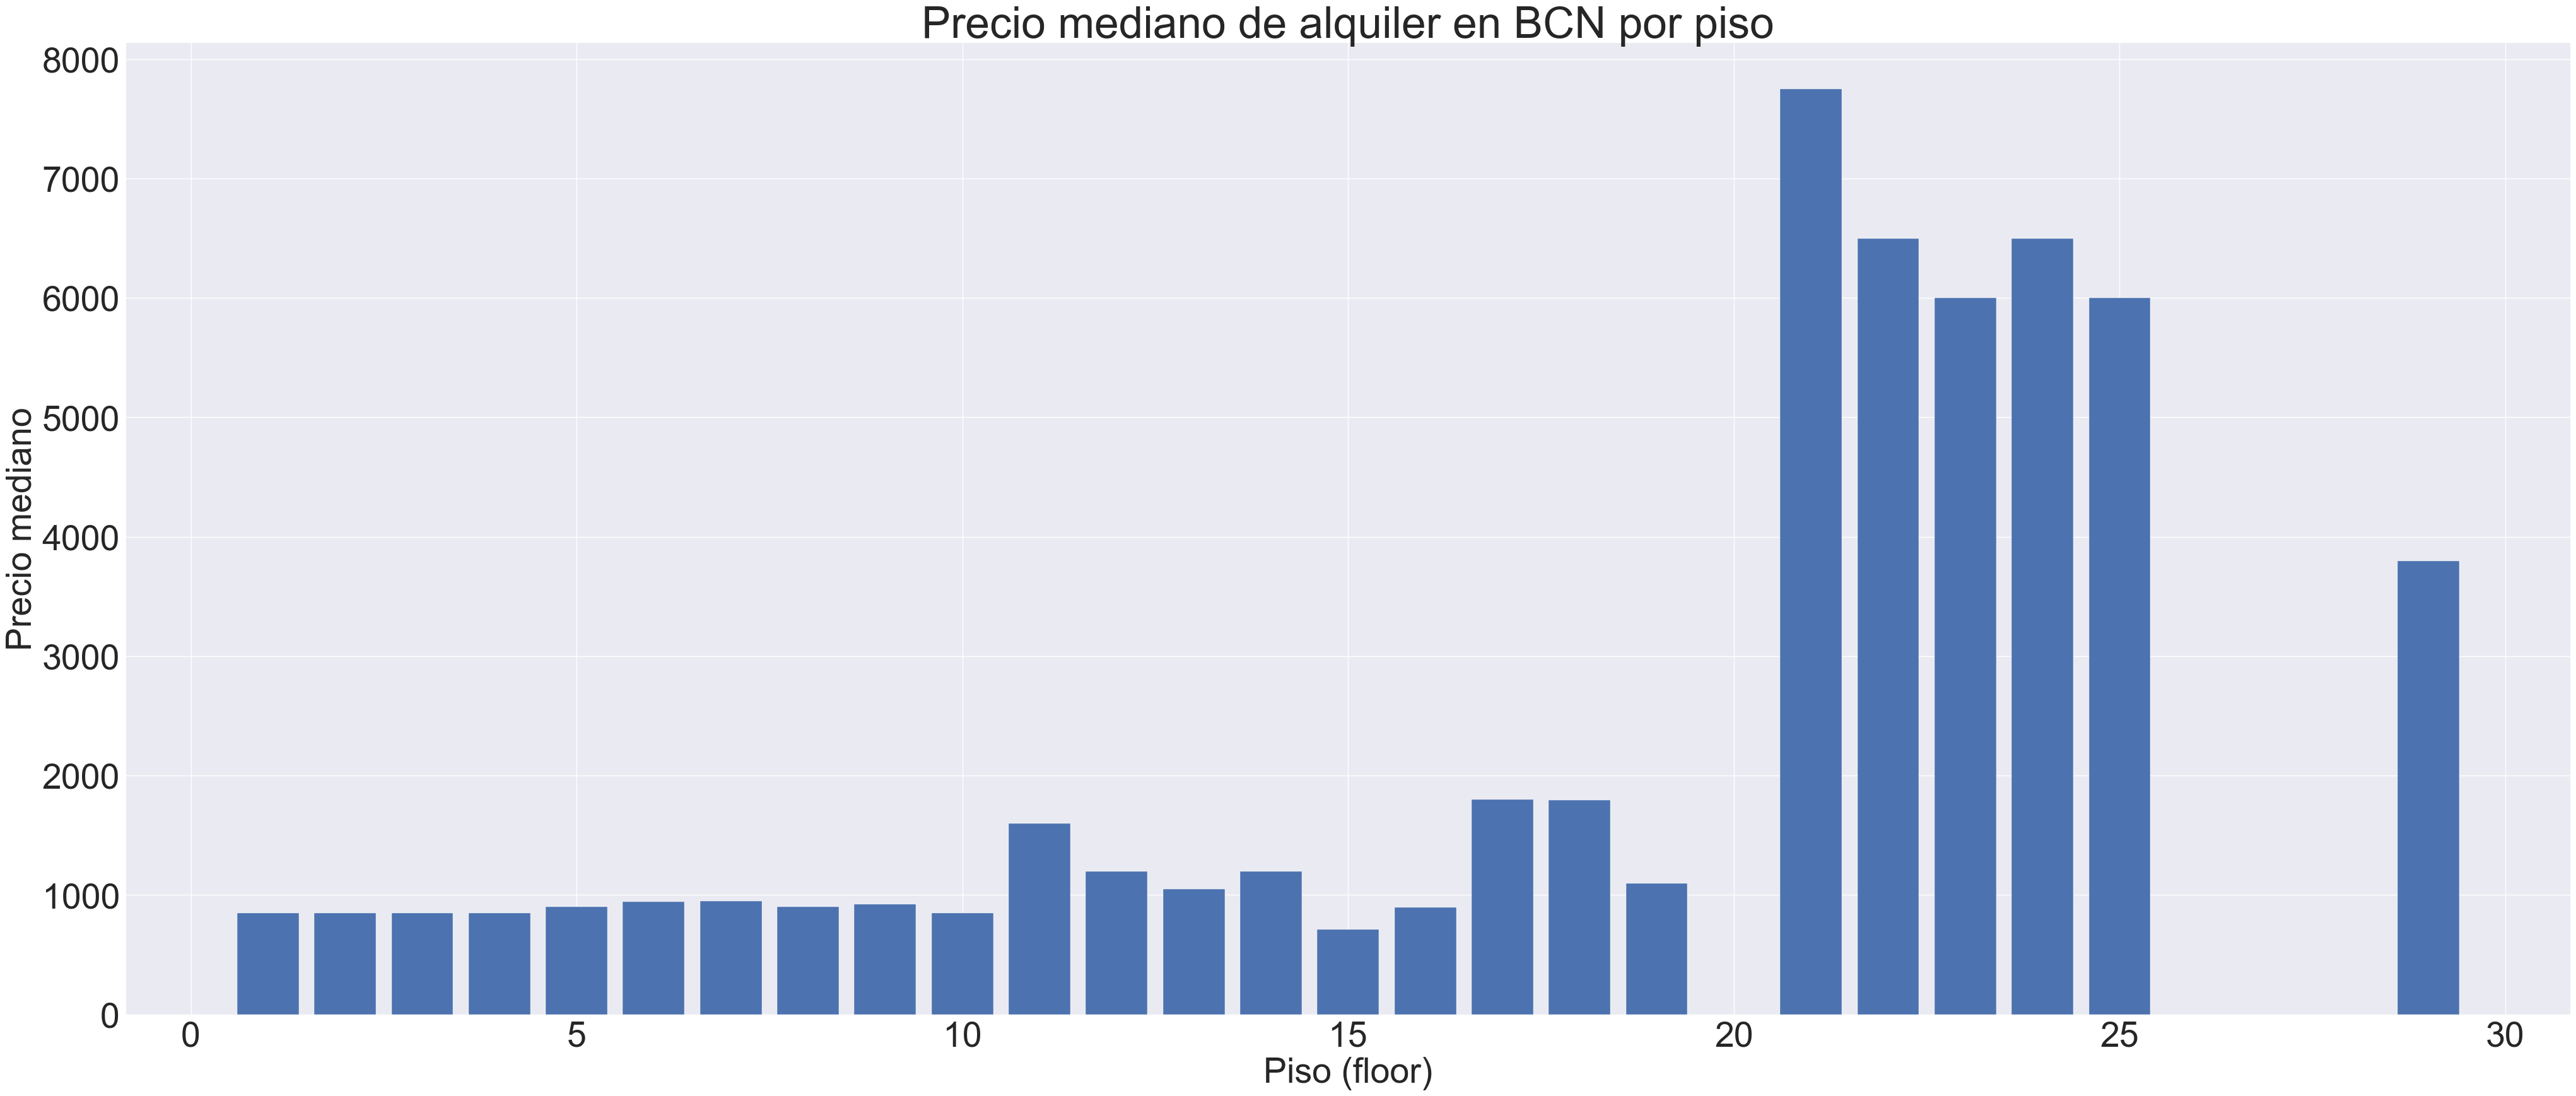

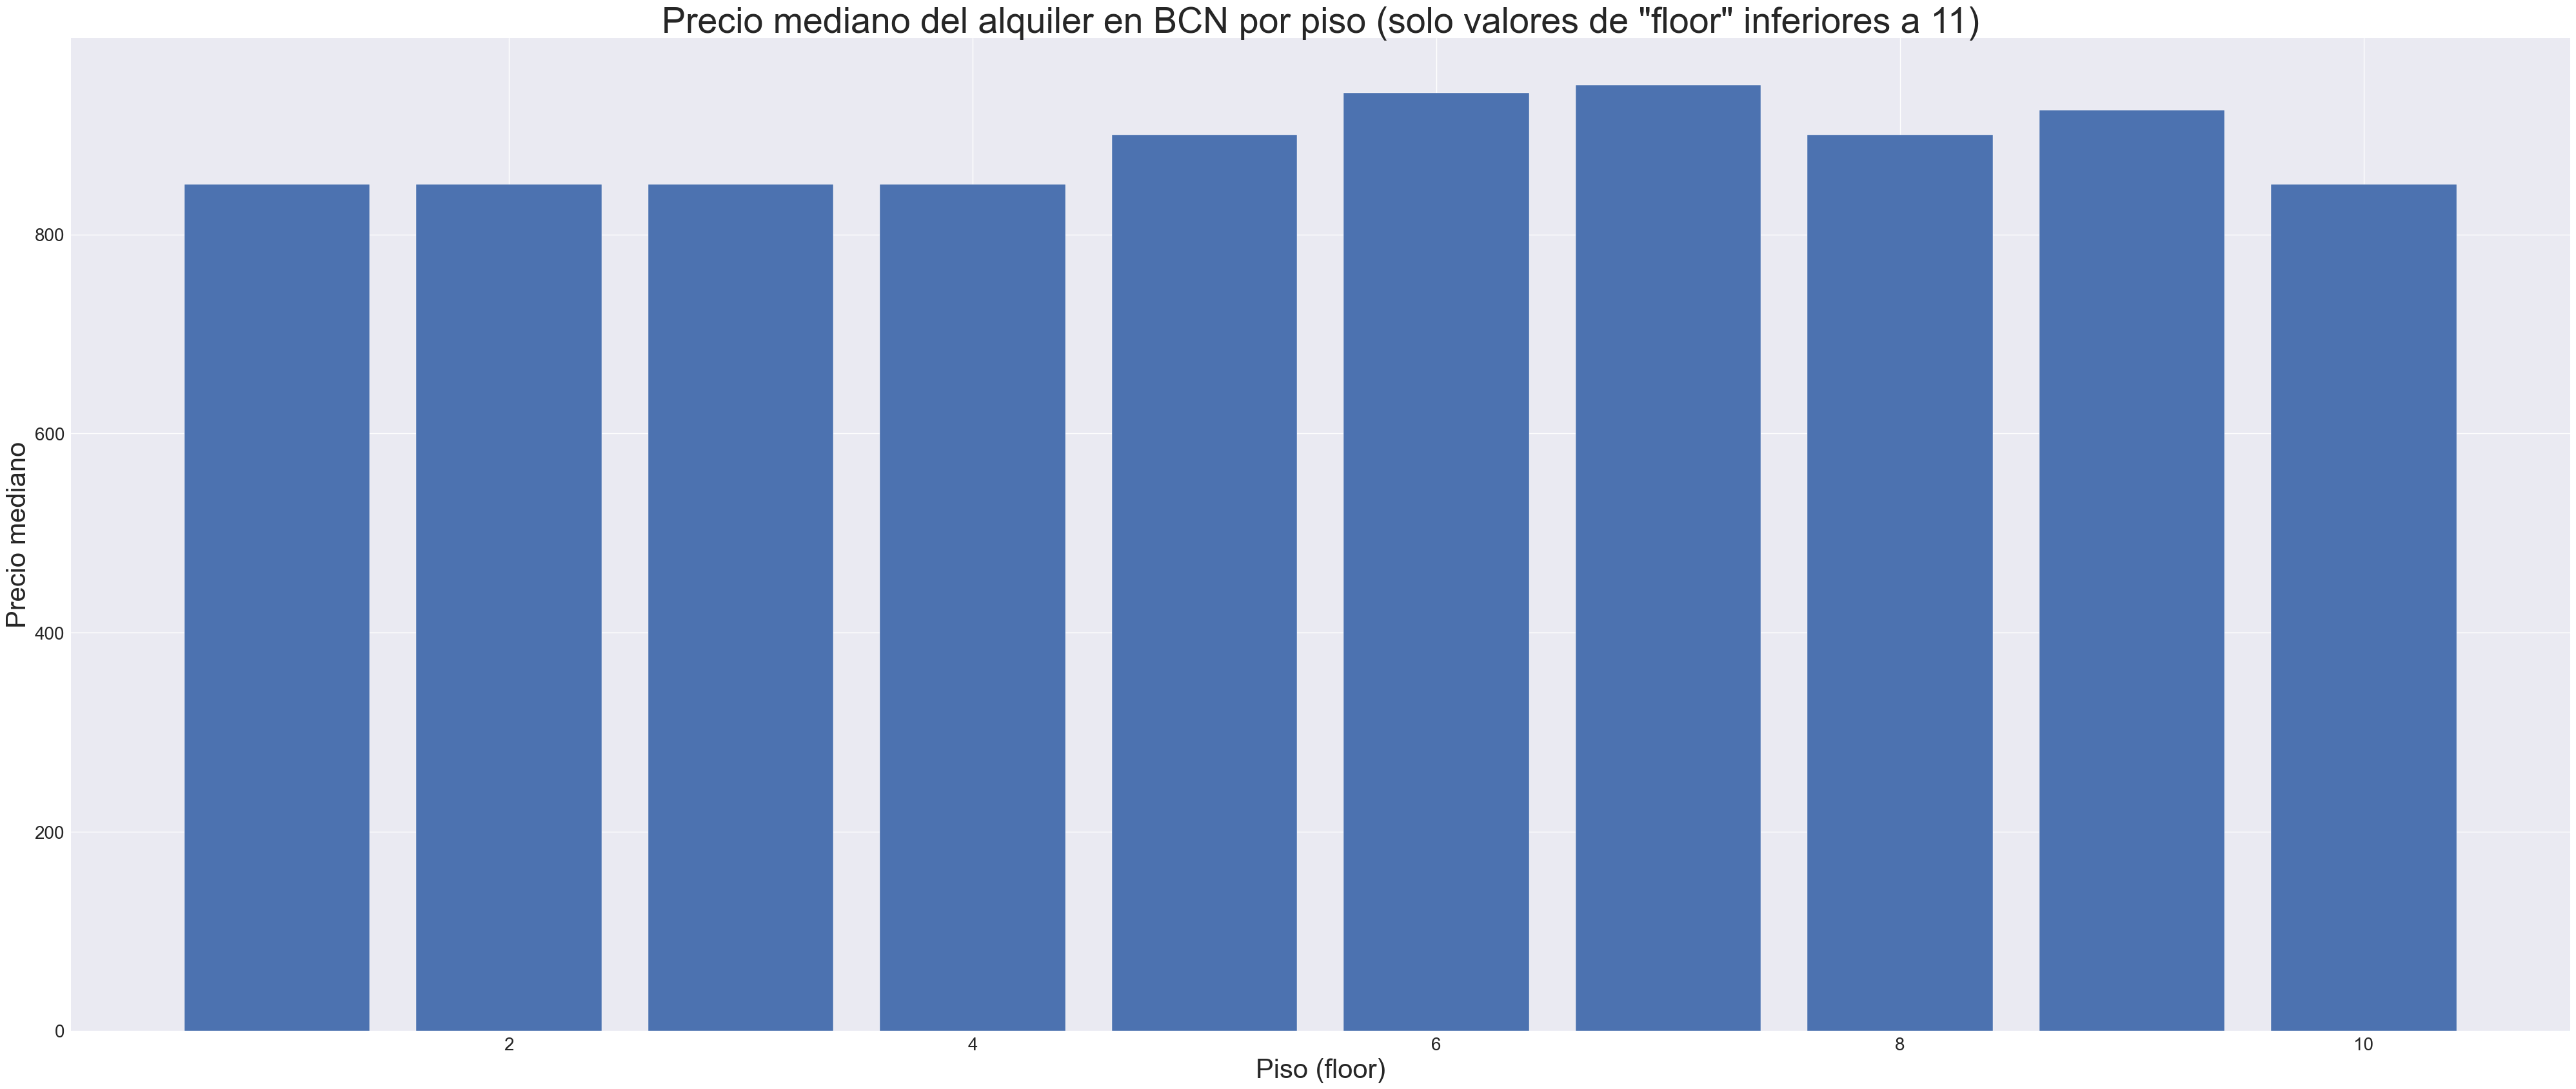

In [442]:
df_floor = rent_data_preprocessed.copy()

floor = df_floor[['floor', 'price']].groupby('floor', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    # Standard deviation
    stantard_deviation=('price', "std")).sort_values('floor', ascending = True).reset_index()
display(floor)

plt.bar(x='floor', height='median_price', data=floor)
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(fontsize=40)  # tamaño de las etiquetas del eje x
plt.yticks(fontsize=40)  # tamaño de las etiquetas del eje y
plt.xlabel('Piso (floor)', fontsize=40)  # etiqueta del eje x y su tamaño
plt.ylabel('Precio mediano', fontsize=40)  # etiqueta del eje y y su tamaño
plt.title('Precio mediano de alquiler en BCN por piso', fontsize=50)  # título del gráfico y su tamaño
plt.show()

fig, ax = plt.subplots(figsize=(50, 20))
ax.bar(x='floor', height='median_price', data=floor[floor['floor'] < 11])
ax.set_xlabel('Piso (floor)', fontsize=30)
ax.set_ylabel('Precio mediano', fontsize=30)
ax.set_title('Precio mediano del alquiler en BCN por piso (solo valores de "floor" inferiores a 11)', fontsize=40)
ax.tick_params(axis='both', labelsize=20)  # aumenta el tamaño de las etiquetas de los ejes
plt.show()

def conditions_floor_rent(x: float) -> str:
    """
    Categorize floors of a property 
    
    Parameters:
    x (Union[float, int]): Number of floors of a property
    
    Returns:
    str: Categorized floor of the property
    """
    if pd.isna(x):  # check for NaN values
        return "Unknown"
    elif x < 0: # viviendas dónde no tengo valores (missing values)
        return "Unknown"
    elif ((x >= 0) & (x <= 5)): # viviendas entre 0 y 5 pisos
        return "0 - 5"
    elif ((x >= 5) & (x <= 10)): # viviendas entre 5 y 10 pisos
        return "5 - 10"
    elif ((x > 10)): # viviendas con más de 10 pisos
        return "+10"
    else:
        return "Unknown"

**Reducción de dimensionalidad de los barrios y categorización según su precio por metro cuadrado**

Hay 76 barrios en BCN


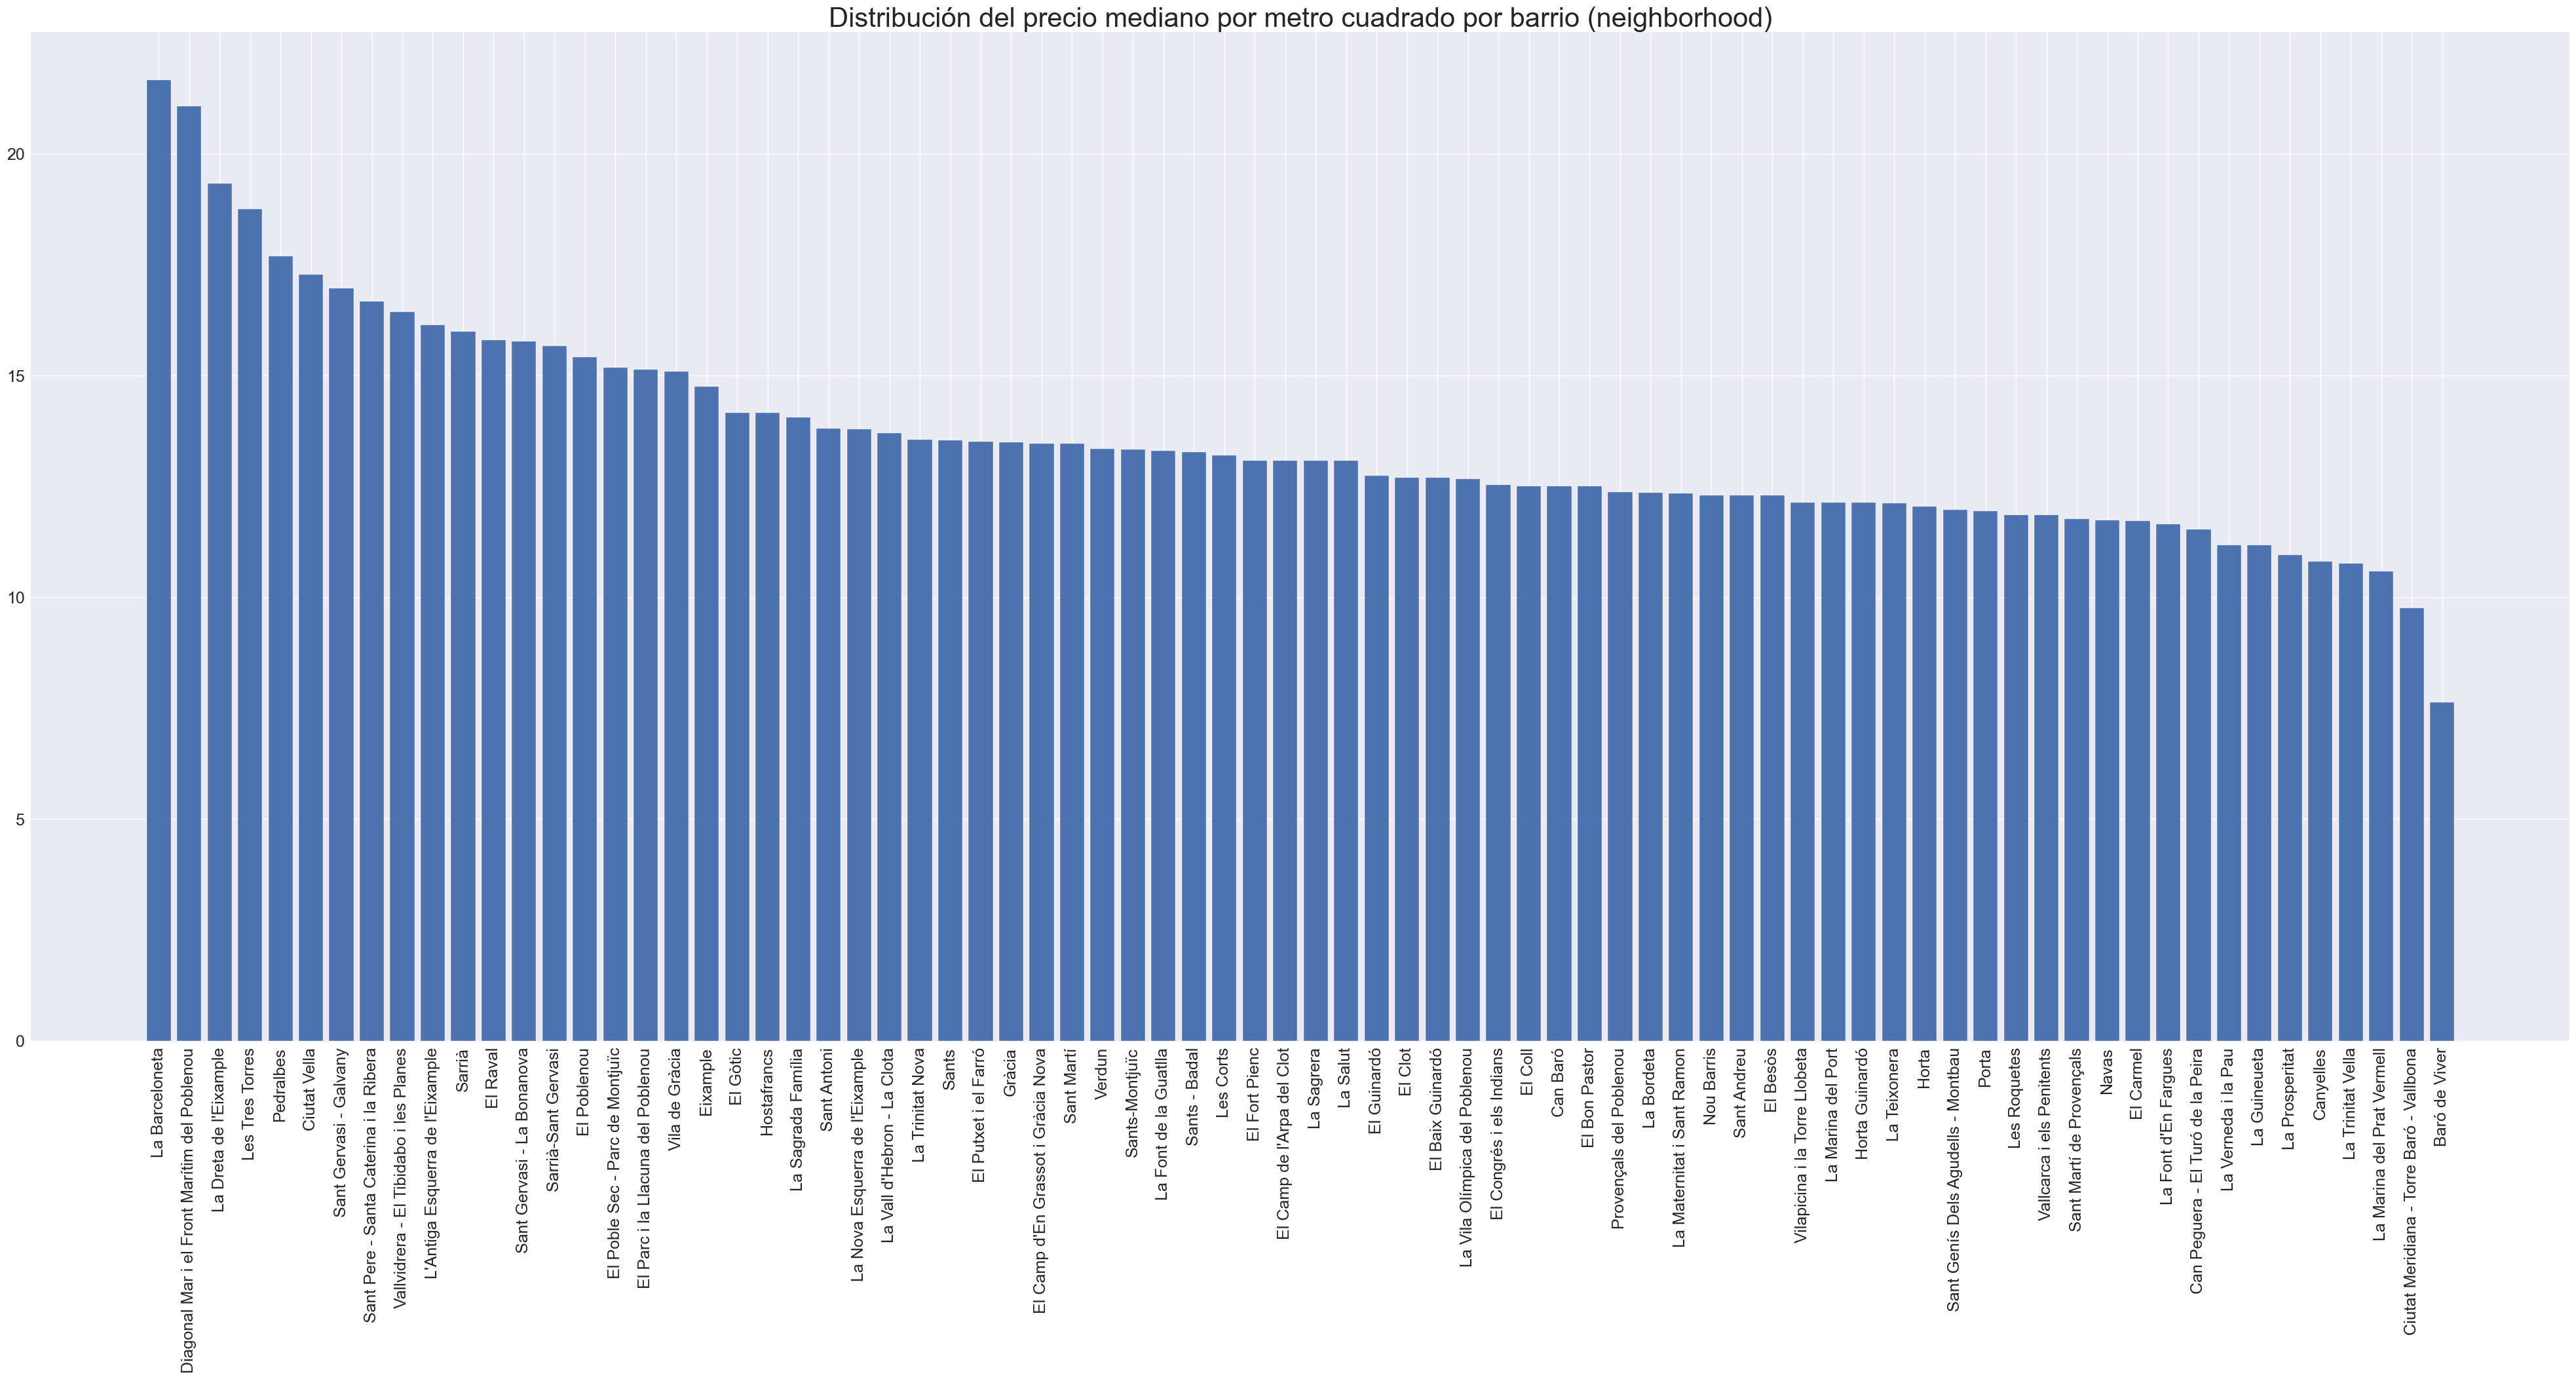

bajo: 12.134853905784137
medio: 13.076923076923077
alto: 14.3125


In [445]:
# número de barrios en BCN 
print(f"Hay {rent_data_preprocessed['neighborhood'].nunique()} barrios en BCN")

neighborhood_df = rent_data_preprocessed[['neighborhood', 'price', 'sq_meters_built']].groupby('neighborhood', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    mean_sq_meters_built=('sq_meters_built', "mean"),
    # Median price
    median_price=('price', "median"),
    # Median price
    median_sq_meters_built=('sq_meters_built', "median"))

neighborhood_df['mean_price_per_sq_meters_built'] = neighborhood_df['mean_price'] / neighborhood_df['mean_sq_meters_built']
neighborhood_df['median_price_per_sq_meters_built'] = neighborhood_df['median_price'] / neighborhood_df['median_sq_meters_built']
neighborhood_df.head()


plt.bar(x = 'neighborhood', 
        height = 'median_price_per_sq_meters_built', 
        data = neighborhood_df.sort_values('median_price_per_sq_meters_built', ascending = False).reset_index()
        )
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.title("Distribución del precio mediano por metro cuadrado por barrio (neighborhood)", fontsize = 30) 
plt.show()


# Definir los límites de cada rango de precios mediante quantiles
bajo = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.25)
medio = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.5)
alto = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.75)

print(f"bajo: {bajo}")
print(f"medio: {medio}")
print(f"alto: {alto}")


# Función para asignar tier 
def assign_price_tier_cluster_rent(x: float) -> str:
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 11.5)): # bajo 
        return "0 - 11.5" 
    
    elif ((x >= 11.5) & (x < 15)): # medio  
        return "11.5 - 15" 
        
    elif ((x >= 15)): # alto
        return "+15" 
    else:
        return "Unknown"

#### Rent dataset pre-processing pipeline: 

Ahora ya podemos actualizar, para el dataset de alquiler, las funciones que calculan los rangos de edad de la vivienda, piso y  precio mediano por metro cuadrado construido:

In [453]:
class DataPreprocessorRent:
    target=TARGET_VARIABLE
    not_useful_vars = ['id', 
                       'doorman', 
                       'quality', 
                       'city', 
                       'currency', 
                       'furniture', 
                       'closest_station',
                       'created_at',
                       'last_seen'
                      ]
    def dataset_preprocessor(self, file_path):
        self.load_data(file_path)
        self.initial_feature_selection()
        self.replace_binary_cols_nulls_by_zero()
        self.convert_binary_to_category()
        
        self.property_age_cat()
        self.property_age_rent_conditions(self.df['property_age'])

        self.missing_values()
        
        self.floor_cat()
        
        self.dim_reduction_neighborhood()
        
        self.convert_object_to_category()
        self.bathrooms_roms_per_100_sqm()
        self.feature_selection_2()

    def load_data(self, file_path):
        self.df = pd.read_csv(file_path, delimiter=',').copy()

        
    def initial_feature_selection(self):
        self.df.drop(self.not_useful_vars, axis=1, inplace=True)

    
    def get_binary_cols(self) -> list[str]:
        """
        Returns a list with the names of the binary variables in a Pandas DataFrame.

        Parameters:
            None
            
        Returns:
            A list with the names of the binary variables in the DataFrame.
        """
        binary_cols = [col for col in self.df if (len(self.df[col].value_counts()) > 0) and all(self.df[col].value_counts().index.isin([0, 1]))]

        return binary_cols
    
    
    def replace_binary_cols_nulls_by_zero(self) -> None:
        """
        Replaces missing values in binary columns of a pandas DataFrame with 0.

        Parameters:
            None

        Returns: 
            None    
        """
        binary_cols = self.get_binary_cols()
        if binary_cols:
            self.df.loc[:, binary_cols] = self.df.loc[:, binary_cols].fillna(0)
    
    
    
    def convert_binary_to_category(self) -> None: 
        # primero las convertimos a int64 para eliminar los decimales: 0 y 1
        self.df[self.get_binary_cols()] = self.df[self.get_binary_cols()].astype("int64")
        # luego las convertimos a 'category': '0' y '1'
        self.df[self.get_binary_cols()] = self.df[self.get_binary_cols()].astype("category")

     
    def property_age_cat(self) -> None: 
        # Creamos la edad (años) de la vivienda:
        self.df['property_age'] = 2023 - self.df['year_built']
        # aplicamos la función a la columna 'property_age' del DataFrame  
        self.df['property_age_cat'] = self.property_age_rent_conditions(self.df['property_age'])

    
    def property_age_rent_conditions(self, x: pd.Series) -> pd.Series:
        """
        Assigns a property age range label to a series of property age values.

        Args:
            x (pd.Series): A series of property age values.

        Returns:
            pd.Series: A series of property age range labels.
        """
        conditions = [
            pd.isna(x),
            x < 0,
            x.between(0, 35),
            x.between(36, 71),
            x.between(72, 111),
            x > 111,
        ]
        choices = [
            "Unknown",
            "Unknown",
            "0 - 35",
            "35 - 71",
            "71 - 111",
            "+111",
        ]
        return np.select(conditions, choices)
    

    def missing_values(self) -> None:
        # variables categóricas con missing values que queremos convertir a categoría 'Unknown'
        cat_features_na_to_unknown = ['property_type', 
                                      'orientation', 
                                      'heating'
                                      ]
        # Fill missing values with 'Unknown' for all columns
        for col in cat_features_na_to_unknown:
            if col == 'heating':
                self.df[col].fillna('Unknown', inplace=True)
                self.df[col].replace('na', 'Unknown', inplace=True)
            else:
                self.df[col].fillna('Unknown', inplace=True)
                
    
    def conditions_floor_rent(self, x: pd.Series) -> pd.Series:
        """
        Categorize floors of a property and assign to a new column 'floor_cat'
        """
        conditions = [
            pd.isna(x),
            x < 0,
            x.between(0, 5),
            x.between(6, 10),
            x > 10,
        ]
        choices = [
            "Unknown",
            "Unknown",
            "0 - 5",
            "5 - 10",
            "+10",
        ]
        return np.select(conditions, choices)



    def floor_cat(self) -> None:
        # aplicamos la función a la columna 'floor' del DataFrame  
        #self.df['floor_cat'] =  self.df['floor'].apply(conditions_floor)
        self.df['floor_cat'] = self.conditions_floor_rent(self.df['floor'])
        #self.df['floor_cat'] = self.conditions_floor(self.df['floor'], self)


    def dim_reduction_neighborhood(self) -> None:
        neighborhood_df = self.df[['neighborhood', 'price', 'sq_meters_built']].groupby('neighborhood', as_index=False).agg(
            # Number of instances per category
            category_count=('price', "count"),
            # Mean price
            mean_price=('price', "mean"),
            # Median price
            mean_sq_meters_built=('sq_meters_built', "mean"),
            # Median price
            median_price=('price', "median"),
            # Median price
            median_sq_meters_built=('sq_meters_built', "median"))

        neighborhood_df['mean_price_per_sq_meters_built'] = neighborhood_df['mean_price'] / neighborhood_df['mean_sq_meters_built']
        neighborhood_df['median_price_per_sq_meters_built'] = neighborhood_df['median_price'] / neighborhood_df['median_sq_meters_built']

        neighborhood_rent_index_cluster = self.assign_price_tier_cluster_rent(neighborhood_df['median_price_per_sq_meters_built'])

        neighborhood_df = neighborhood_df.assign(neighborhood_rent_index_cluster=neighborhood_rent_index_cluster)

        # agregamos esta información el modelo de datos:
        neighborhood_mapping = neighborhood_df[['neighborhood', 'neighborhood_rent_index_cluster']]
        self.df = pd.merge(self.df, neighborhood_mapping, on='neighborhood', how='left')

        
    # asignamos tiers
    def assign_price_tier_cluster_rent(self, x: Optional[pd.Series] = None) -> pd.Series:
        if x is None:
            x = self.df['median_price_per_sq_meters_built']

        conditions = [
            pd.isna(x),
            x < 0,
            x < 11.5, # bajo 
            x < 15, # medio  
            x >= 15 # alto
        ]
        choices = [
            "Unknown",
            "Unknown",
            "0 - 11.5",
            "11.5 - 15",
            "+15"
        ]
        return np.select(conditions, choices)

    
   
    ###### Convertimos las categóricas de object a category ########
    def convert_object_to_category(self) -> pd.DataFrame:
        """
        Convert object columns in a pandas dataframe to category data type.

        Parameters:
        df (pd.DataFrame): Input pandas dataframe

        Returns:
        pd.DataFrame: A copy of the input dataframe with object columns converted to category data type.
        """    
        # loop through columns and convert object columns to category
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                self.df[col] = self.df[col].astype('category')

        return self.df


    ####### Tratamiento de sq_meters_built en relación al número de habitaciones y de baños #######
    def bathrooms_roms_per_100_sqm(self) -> None: 
        self.df['rooms_per_100_sqm'] = self.df['rooms'] * 100 / self.df['sq_meters_built']
        self.df['bathrooms_per_100_sqm'] = self.df['bathrooms'] * 100 / self.df['sq_meters_built']

    def feature_selection_2(self) -> None:
        ########## Feature Selection 2: Eliminación de variables no útiles #########
        # variables a eliminar 
        not_useful_vars = ['year_built', 'sq_meters', 'floor','property_age']
        # eliminamos not_useful_vars
        self.df.drop(not_useful_vars, axis=1, inplace=True)

In [454]:
# RENT DATASET PRE-PROCESSING
file_path_rent = 'renting_Barcelona.csv'

data_preprocessor = DataPreprocessorRent()
data_preprocessor.dataset_preprocessor(file_path_rent)

# guardamos en csv
data_preprocessor.df.to_csv('rent_data_preprocessed.csv', index=False)

In [456]:
# cargamos el dataset de rent preprocesado
rent_data_preprocessed = pd.read_csv('rent_data_preprocessed.csv', delimiter=',')
# convertimos object a category
rent_data_preprocessed = convert_object_to_category(rent_data_preprocessed)
explore_data(rent_data_preprocessed)

The dataset includes 8502 instances (rows) and 26 variables (columns).



,price,latitude,longitude,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,rooftop,elevator,pool,ac,heating,neighborhood,dist_city_center,garage,property_type,garden,dist_closest_station,property_age_cat,floor_cat,neighborhood_rent_index_cluster,rooms_per_100_sqm,bathrooms_per_100_sqm
0,850,41.401708,2.154077,55,2,1,0,0,1,norte,0,0,0,1,Unknown,Gràcia,2.026455,0,piso,0,0.094111,Unknown,0 - 5,11.5 - 15,3.636364,1.818182
1,725,41.407221,2.135569,37,2,1,1,0,1,sur,0,1,0,1,Unknown,Sant Gervasi - La Bonanova,3.582409,0,piso,0,0.902561,35 - 71,0 - 5,+15,5.405405,2.702703
2,950,41.411508,2.164608,72,3,1,0,0,1,Unknown,0,1,0,1,Unknown,El Baix Guinardó,2.663025,0,piso,0,0.188177,Unknown,0 - 5,11.5 - 15,4.166667,1.388889
3,750,41.402256,2.140764,45,1,1,1,0,1,norte,0,1,0,0,Unknown,Sant Gervasi - La Bonanova,2.910067,0,piso,0,0.892917,71 - 111,0 - 5,+15,2.222222,2.222222
4,990,41.405327,2.146929,45,1,1,0,0,1,sur,0,1,0,0,gas,Sarrià-Sant Gervasi,2.727149,0,piso,0,0.293784,Unknown,0 - 5,+15,2.222222,2.222222




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            8502 non-null   int64   
 1   latitude                         8502 non-null   float64 
 2   longitude                        8502 non-null   float64 
 3   sq_meters_built                  8502 non-null   int64   
 4   rooms                            8502 non-null   int64   
 5   bathrooms                        8502 non-null   int64   
 6   balcony                          8502 non-null   int64   
 7   terrace                          8502 non-null   int64   
 8   exterior                         8502 non-null   int64   
 9   orientation                      8502 non-null   category
 10  rooftop                          8502 non-null   int64   
 11  elevator                         8502 non-null   int64   
 12  pool

,price,latitude,longitude,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,rooftop,elevator,pool,ac,dist_city_center,garage,garden,dist_closest_station,rooms_per_100_sqm,bathrooms_per_100_sqm
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000
mean,1117.482828,41.398106,2.162651,72.478711,2.075394,1.265349,0.409904,0.226770,0.811103,0.072571,0.663138,0.037756,0.480593,2.616749,0.045283,0.005999,0.392531,2.960772,1.930918
std,1010.198242,0.018344,0.020805,49.650215,1.155006,0.602056,0.491845,0.418767,0.391450,0.259447,0.472665,0.190616,0.499653,1.409102,0.207937,0.077222,0.290708,1.375317,0.674082
min,365.000000,41.353583,2.102393,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062165,0.000000,0.000000,0.007875,0.000000,0.108460
25%,768.250000,41.382177,2.146160,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.475110,0.000000,0.000000,0.225168,2.127660,1.470588
50%,850.000000,41.397202,2.164480,63.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.481490,0.000000,0.000000,0.325357,3.030303,1.801802
75%,1100.000000,41.409961,2.178082,79.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.589782,0.000000,0.000000,0.453814,4.000000,2.222222
max,27500.000000,41.467905,2.218582,981.000000,11.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.940761,1.000000,1.000000,3.177445,8.333333,9.090909



 Number of duplicates: 30


### Cálculo de predicciones del precio de venta de la vivienda sobre el dataset de alquiler

Recordemos que el modelo que mejor predijo el precio de la vivienda fué el modelo 3.1 de bagging, es decir, el modelo de bagging en el dataset de venta dónde se había seleccionando las variables más importantes (mediante técnicas como PCA, Análisis de Correlación, Información Mutua, ANOVA y ExtraTreesRegressor), tratando outliers (método IQR) pero sin escalar las variables numéricas.

Por tanto, aplicamos otra capa de procesamiento a los datasets de alquiler para tenerlos en el formato óptimo para hacer predicciones. 

In [496]:
# creamos los datasets para el tercer modelo de Bagging y RF
bagging_rent_preprocessed = rent_data_preprocessed.copy(deep=True)

# lista contiene las variables que se consideran más importantes o informativas 
# para predecir el precio de la vivienda en Barcelona, según los diferentes métodos de análisis utilizados.
good_predictors = ["price", # target variable
                   "sq_meters_built", "longitude", 
                   "dist_city_center", "latitude", "bathrooms_per_100_sqm", 
                   "rooms_per_100_sqm", "neighborhood_rent_index_cluster",                    
                   "garage", "garden", "pool", "terrace", "property_type", 
                   "property_age_cat", "elevator", "ac", "heating"]
# nos quedamos sólo con las columnas indicadas en la lista good_predictors
bagging_rent_preprocessed = bagging_rent_preprocessed[good_predictors]

# Debemos tener las mismas columnas que en el dataset de venta: 
    # eliminamos la columna property_type = 'Unknown' (hay 2 'Unknown') como hicimos en el dataset de venta. 
bagging_rent_preprocessed.drop(bagging_rent_preprocessed[bagging_rent_preprocessed['property_type'] == 'Unknown'].index, inplace=True)


# variables que queremos codificar usando ordinal encoder
oe_cols = oe_cols = ['property_age_cat', 'neighborhood_rent_index_cluster']
# Define the order of the categories for each column
property_age_cat_order = ['Unknown', '0 - 35', '35 - 71', '71 - 111', '+111']
neighborhood_rent_index_cluster_order = ['Unknown', '0 - 11.5', '11.5 - 15','+15']
# Create an instance of the ordinal encoder
encoder = OrdinalEncoder(categories=[property_age_cat_order, 
                                     neighborhood_rent_index_cluster_order])

for col in oe_cols:
    # Create a new column name for the encoded data
    new_col = col + '_encoded'
    # Create an instance of the ordinal encoder
    encoder = OrdinalEncoder(categories=[eval(col+'_order')])
    # Fit and transform the selected columns
    bagging_rent_preprocessed[new_col] = encoder.fit_transform(bagging_rent_preprocessed[[col]])
    # replace 0 by -1 ('Unknown' by -1)
    bagging_rent_preprocessed[new_col] = bagging_rent_preprocessed[new_col].replace(0, -1)

# variables que queremos codificar usando OHE
ohe_cols = ["garage", "garden", "pool", 
            "terrace", "property_type", 
            "elevator", "ac", "heating"]

# aplicamos one - hot encoding al dataset
bagging_rent_preprocessed = one_hot_encode(bagging_rent_preprocessed, ohe_cols)

# eliminamos variables categóricas no codificadas
no_encoded_cat_vars = bagging_rent_preprocessed.select_dtypes(include=['category']).columns.tolist()
bagging_rent_preprocessed.drop(no_encoded_cat_vars, axis=1, inplace=True)


############# Tratamos los outliers pero NO escalamos los atributos numéricos: ###############
num_vars = ["price", "sq_meters_built", "longitude", "dist_city_center", 
            "latitude", "bathrooms_per_100_sqm", "rooms_per_100_sqm"]

# define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('outlier_removal', OutlierRemover(cols=num_vars))
    #,('scaler', ColumnTransformer([('num_scaler', MinMaxScaler(), num_vars)], 
                                 #remainder='passthrough'))
])

# Apply the preprocessing pipeline to the training and testing data
    # Fit and transform the training data
bagging_rent_preprocessed = pd.DataFrame(preprocessing_pipeline.fit_transform(bagging_rent_preprocessed), 
                                         columns=num_vars + list(bagging_rent_preprocessed.columns[len(num_vars):]))

# exploración rápida del df
print("RENTING DATASET PRE-PROCESSED FOR BAGGING: ")
explore_data(bagging_rent_preprocessed)

RENTING DATASET PRE-PROCESSED FOR BAGGING: 
The dataset includes 7176 instances (rows) and 34 variables (columns).



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


,price,sq_meters_built,longitude,dist_city_center,latitude,bathrooms_per_100_sqm,rooms_per_100_sqm,property_age_cat_encoded,neighborhood_rent_index_cluster_encoded,garage_0,garage_1,garden_0,garden_1,pool_0,pool_1,terrace_0,terrace_1,property_type_atico,property_type_chalet,property_type_chalet_adosado,property_type_chalet_independiente,property_type_chalet_pareado,property_type_duplex,property_type_estudio,property_type_piso,elevator_0,elevator_1,ac_0,ac_1,heating_Unknown,heating_bomba,heating_electric,heating_gas,heating_individual
0,850,55,2.154077,2.026455,41.401708,1.818182,3.636364,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,725,37,2.135569,3.582409,41.407221,2.702703,5.405405,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,950,72,2.164608,2.663025,41.411508,1.388889,4.166667,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,750,45,2.140764,2.910067,41.402256,2.222222,2.222222,3.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,990,45,2.146929,2.727149,41.405327,2.222222,2.222222,-1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0




<class 'pandas.core.frame.DataFrame'>
Int64Index: 7176 entries, 0 to 8499
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   price                                    7176 non-null   int64  
 1   sq_meters_built                          7176 non-null   int64  
 2   longitude                                7176 non-null   float64
 3   dist_city_center                         7176 non-null   float64
 4   latitude                                 7176 non-null   float64
 5   bathrooms_per_100_sqm                    7176 non-null   float64
 6   rooms_per_100_sqm                        7176 non-null   float64
 7   property_age_cat_encoded                 7176 non-null   float64
 8   neighborhood_rent_index_cluster_encoded  7176 non-null   float64
 9   garage_0                                 7176 non-null   float64
 10  garage_1                                 7176 

,price,sq_meters_built,longitude,dist_city_center,latitude,bathrooms_per_100_sqm,rooms_per_100_sqm,property_age_cat_encoded,neighborhood_rent_index_cluster_encoded,garage_0,garage_1,garden_0,garden_1,pool_0,pool_1,terrace_0,terrace_1,property_type_atico,property_type_chalet,property_type_chalet_adosado,property_type_chalet_independiente,property_type_chalet_pareado,property_type_duplex,property_type_estudio,property_type_piso,elevator_0,elevator_1,ac_0,ac_1,heating_Unknown,heating_bomba,heating_electric,heating_gas,heating_individual
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.0,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,883.412625,61.805741,2.163730,2.646847,41.398378,1.904405,3.083801,0.662068,2.368450,0.983278,0.016722,0.999861,0.000139,0.988434,0.011566,0.822046,0.177954,0.050307,0.000418,0.000697,0.0,0.000418,0.010591,0.070652,0.866918,0.362319,0.637681,0.572046,0.427954,0.578177,0.085981,0.083891,0.169732,0.082219
std,199.927849,17.981311,0.020129,1.398489,0.019105,0.538574,1.370112,1.860558,0.508851,0.128238,0.128238,0.011805,0.011805,0.106931,0.106931,0.382501,0.382501,0.218592,0.020444,0.026389,0.0,0.020444,0.102373,0.256261,0.339688,0.480704,0.480704,0.494817,0.494817,0.493885,0.280356,0.277243,0.375424,0.274716
min,365.000000,30.000000,2.102393,0.100250,41.353583,0.826446,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.000000,50.000000,2.147729,1.523426,41.381405,1.492537,2.222222,-1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.000000,60.000000,2.165371,2.490225,41.397956,1.818182,3.174603,-1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,950.000000,72.000000,2.178673,3.633408,41.411501,2.222222,4.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1595.000000,122.000000,2.218582,6.758312,41.448580,3.333333,6.666667,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



 Number of duplicates: 31


Ya tenemos el dataset de alquiler procesado. 


Hacemos las predicciones del precio de venta de las viviendas sobre el dataset de alquiler con el Modelo 3.1 de Bagging:

In [505]:
# When we have already trained and obtained the 'results_4' object using the sale dataset:

# eliminamos el precio del dataset de alquiler para que tenga las mismas variables que el de venta
data_pred = bagging_rent_preprocessed.drop([TARGET_VARIABLE], axis=1)

# make predictions using the trained model
y_pred = results_4.predict(data_pred)

# Add the predictions to the preprocessed dataset
pred_price_sale_df = data_pred.copy(deep=True)
pred_price_sale_df['pred_selling_price'] = y_pred

# Save the updated dataset with predictions
pred_price_sale_df.to_csv('pred_price_sale_df.csv', index=False)

In [507]:
# resultados predicción 
pred_price_sale_df.head()

,sq_meters_built,longitude,dist_city_center,latitude,bathrooms_per_100_sqm,rooms_per_100_sqm,property_age_cat_encoded,neighborhood_rent_index_cluster_encoded,garage_0,garage_1,garden_0,garden_1,pool_0,pool_1,terrace_0,terrace_1,property_type_atico,property_type_chalet,property_type_chalet_adosado,property_type_chalet_independiente,property_type_chalet_pareado,property_type_duplex,property_type_estudio,property_type_piso,elevator_0,elevator_1,ac_0,ac_1,heating_Unknown,heating_bomba,heating_electric,heating_gas,heating_individual,pred_selling_price
0,55,2.154077,2.026455,41.401708,1.818182,3.636364,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,162437.788502
1,37,2.135569,3.582409,41.407221,2.702703,5.405405,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,151045.177459
2,72,2.164608,2.663025,41.411508,1.388889,4.166667,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,250205.849483
3,45,2.140764,2.910067,41.402256,2.222222,2.222222,3.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,213758.428997
4,45,2.146929,2.727149,41.405327,2.222222,2.222222,-1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,236845.788665


In [511]:
# Merge (por índice, ya que son los mismos) de los dos datasets: 
    # bagging_rent_preprocessed y pred_price_sale_df (que contiene el precio de venta predicho)
rent_pred_selling_price_df = bagging_rent_preprocessed.merge(pred_price_sale_df[['pred_selling_price']], left_index=True, right_index=True)
# Save the merge
rent_pred_selling_price_df.to_csv('rent_pred_selling_price_df.csv', index=False)

rent_pred_selling_price_df.head()

,price,sq_meters_built,longitude,dist_city_center,latitude,bathrooms_per_100_sqm,rooms_per_100_sqm,property_age_cat_encoded,neighborhood_rent_index_cluster_encoded,garage_0,garage_1,garden_0,garden_1,pool_0,pool_1,terrace_0,terrace_1,property_type_atico,property_type_chalet,property_type_chalet_adosado,property_type_chalet_independiente,property_type_chalet_pareado,property_type_duplex,property_type_estudio,property_type_piso,elevator_0,elevator_1,ac_0,ac_1,heating_Unknown,heating_bomba,heating_electric,heating_gas,heating_individual,pred_selling_price
0,850,55,2.154077,2.026455,41.401708,1.818182,3.636364,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,162437.788502
1,725,37,2.135569,3.582409,41.407221,2.702703,5.405405,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,151045.177459
2,950,72,2.164608,2.663025,41.411508,1.388889,4.166667,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,250205.849483
3,750,45,2.140764,2.910067,41.402256,2.222222,2.222222,3.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,213758.428997
4,990,45,2.146929,2.727149,41.405327,2.222222,2.222222,-1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,236845.788665


### Cálculo de la métrica de Break-even

Hemos generado 10 modelos distintos y los hemos entrenado con los datos de venta. 
Ahora, hemos generado predicciones del precio de venta de la vivienda sobre el dataset de alquiler. Por tanto, ahora en el dataset de alquiler, tenemos el precio de alquiler (que ya viene dado) y el precio de venta predicho por nuestro modelo. 

De esta forma, podremos hacer una comparativa: calcularemos el retorno de la inversión. Es decir, el precio de venta dividido entre el precio mensual por alquiler. Esto nos va a dar meses, por tanto, x meses significará que con el alquiler de x meses nos podemos pagar el piso (el precio de venta total).

Con esto, podremos hacer un análisis del retorno de la inversión: qué viviendas son más rentables en Barcelona para comprar y luego alquilar, en qué barrios, qué tamaños tienen, si tienen aire acondicionado o no, etc. 

La métrica break-even, que en este caso se expresa en meses, se refiere al número de meses de alquiler necesarios para recuperar el costo de la propiedad. Es decir, cuanto menor sea el valor de break-even, más rápido se recuperará la inversión en la propiedad a través del alquiler.

Por ejemplo, si la métrica break-even es de 240 meses, significa que se necesitan 240 meses de alquiler para recuperar el costo de la propiedad. Si el alquiler mensual es de 1000 euros y el precio de venta de la propiedad es de 240000 euros, entonces la métrica break-even sería de 240 meses. 


La métrica break-even se calcula dividiendo el precio de venta predicho por el precio mensual de alquiler:

In [546]:
#### Ejemplo: 
precio_venta = 240000
precio_alquiler_mensual = 1000
break_even = precio_venta/precio_alquiler_mensual
print(f"Se tardarán {break_even} meses de alquiler para recuperar el costo de la propiedad.")

Se tardarán 240.0 meses de alquiler para recuperar el costo de la propiedad.


In [570]:
rent_pred_selling_price_breakeven_df = rent_pred_selling_price_df.copy(deep=True)

Break-even en meses:

In [571]:
# Calcular break-even point: break-even point = pred_selling_price / price
rent_pred_selling_price_breakeven_df['break_even'] = rent_pred_selling_price_breakeven_df['pred_selling_price'] / rent_pred_selling_price_breakeven_df['price']

Expresamos el break-even en años para tener una idea más intuitiva de cuánto tiempo se tardaría en recuperar la inversión:

In [572]:
rent_pred_selling_price_breakeven_df['break_even_years'] = rent_pred_selling_price_breakeven_df['break_even']/12

Mostramos los resultados:

In [577]:
# ordenamos por columnas que más nos interesan: 
excluded_columns = ['price', 'pred_selling_price', 'break_even', 'break_even_years', 'sq_meters_built', 'dist_city_center']
included_columns = list(set(rent_pred_selling_price_breakeven_df.columns) - set(excluded_columns))

rent_pred_selling_price_breakeven_df = rent_pred_selling_price_breakeven_df[excluded_columns + included_columns]

In [578]:
### Rentables: la inversión en la propiedad a través del alquiler se recuperará rápido
display(rent_pred_selling_price_breakeven_df.sort_values('break_even',ascending=True).head())

### Poco rentables: la inversión en la propiedad a través del alquiler se recuperará al cabo de muchos años
display(rent_pred_selling_price_breakeven_df.sort_values('break_even',ascending=False).head())

,price,pred_selling_price,break_even,break_even_years,sq_meters_built,dist_city_center,ac_0,bathrooms_per_100_sqm,property_type_chalet_pareado,property_age_cat_encoded,garden_0,heating_gas,rooms_per_100_sqm,elevator_0,garden_1,property_type_chalet_adosado,terrace_1,property_type_atico,neighborhood_rent_index_cluster_encoded,latitude,ac_1,elevator_1,heating_electric,property_type_estudio,heating_Unknown,terrace_0,longitude,property_type_chalet_independiente,garage_1,property_type_duplex,pool_0,garage_0,pool_1,property_type_chalet,property_type_piso,heating_bomba,heating_individual
1864,1050,97366.291413,92.729801,7.727483,30,3.731620,0.0,3.333333,0.0,-1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,2.0,41.416688,1.0,0.0,0.0,1.0,1.0,1.0,2.146954,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4312,1500,167659.963490,111.773309,9.314442,60,0.970419,0.0,1.666667,0.0,-1.0,1.0,0.0,1.666667,1.0,0.0,0.0,0.0,0.0,2.0,41.392659,1.0,0.0,0.0,0.0,0.0,1.0,2.160173,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4132,1300,146400.530243,112.615792,9.384649,30,1.324574,0.0,3.333333,0.0,-1.0,1.0,0.0,3.333333,0.0,0.0,0.0,1.0,1.0,2.0,41.377573,1.0,1.0,0.0,0.0,0.0,0.0,2.162017,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
700,1400,158255.759792,113.039828,9.419986,65,3.550204,0.0,1.538462,0.0,-1.0,1.0,0.0,3.076923,1.0,0.0,0.0,1.0,0.0,2.0,41.419086,1.0,0.0,0.0,0.0,0.0,0.0,2.178978,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4363,1300,148715.178773,114.396291,9.533024,30,1.182899,0.0,3.333333,0.0,3.0,1.0,0.0,3.333333,0.0,0.0,0.0,1.0,1.0,2.0,41.378973,1.0,1.0,0.0,0.0,1.0,0.0,2.162217,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


,price,pred_selling_price,break_even,break_even_years,sq_meters_built,dist_city_center,ac_0,bathrooms_per_100_sqm,property_type_chalet_pareado,property_age_cat_encoded,garden_0,heating_gas,rooms_per_100_sqm,elevator_0,garden_1,property_type_chalet_adosado,terrace_1,property_type_atico,neighborhood_rent_index_cluster_encoded,latitude,ac_1,elevator_1,heating_electric,property_type_estudio,heating_Unknown,terrace_0,longitude,property_type_chalet_independiente,garage_1,property_type_duplex,pool_0,garage_0,pool_1,property_type_chalet,property_type_piso,heating_bomba,heating_individual
4884,850,473593.805399,557.169183,46.430765,110,1.148911,1.0,0.909091,0.0,-1.0,1.0,0.0,1.818182,1.0,0.0,0.0,0.0,0.0,3.0,41.384105,0.0,0.0,0.0,0.0,1.0,1.0,2.182724,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3821,769,427413.206981,555.803910,46.316993,62,0.299793,0.0,1.612903,0.0,-1.0,1.0,0.0,1.612903,0.0,0.0,0.0,0.0,0.0,3.0,41.390584,1.0,1.0,0.0,0.0,1.0,1.0,2.169589,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1344,700,380362.736780,543.375338,45.281278,80,3.151259,0.0,2.500000,0.0,-1.0,1.0,0.0,2.500000,1.0,0.0,0.0,0.0,0.0,3.0,41.404724,1.0,0.0,0.0,0.0,1.0,1.0,2.139533,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5477,900,473101.875227,525.668750,43.805729,86,1.301826,1.0,2.325581,0.0,4.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,41.385463,0.0,1.0,1.0,1.0,0.0,1.0,2.185178,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6523,750,389337.365227,519.116487,43.259707,93,0.380341,1.0,1.075269,0.0,-1.0,1.0,0.0,2.150538,1.0,0.0,0.0,0.0,0.0,3.0,41.386194,0.0,0.0,0.0,0.0,1.0,1.0,2.165970,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


- La propiedad que tiene la métrica break-even más baja (en años) es de 7.72, lo que signfica que la inversión en la propiedad a través del alquiler se recuperará relativamente rápido: en 93 meses o 8 años aproximadamente. 

- La propiedad que tiene la métrica break-even más alta (en años) es de 46.43, lo que signfica que la inversión en la propiedad a través del alquiler se recuperará al cabo de muchísimos años: en 557 meses o 46 años aproximadamente. 

### Análisis del retorno de la inversión

Hemos visto cuántos años tardaríamos en recuperar la inversión a través de los ingresos de alquiler. 

Ahora analizaremos qué tipos de viviendas son las más rentables en Barcelona para comprar y alquilar.

- Haremos un análisis del retorno de la inversión: qué viviendas son más rentables en Barcelona para comprar y luego alquilar, en qué barrios, qué tamaños tienen, si tienen aire acondicionado o no, etc. 

**Metros cuadrados construidos**

Podría haber una relación inversa entre los metros cuadrados construidos y la métrica de break-even, lo que significa que las viviendas más pequeñas podrían ser más rentables para comprar y alquilar.

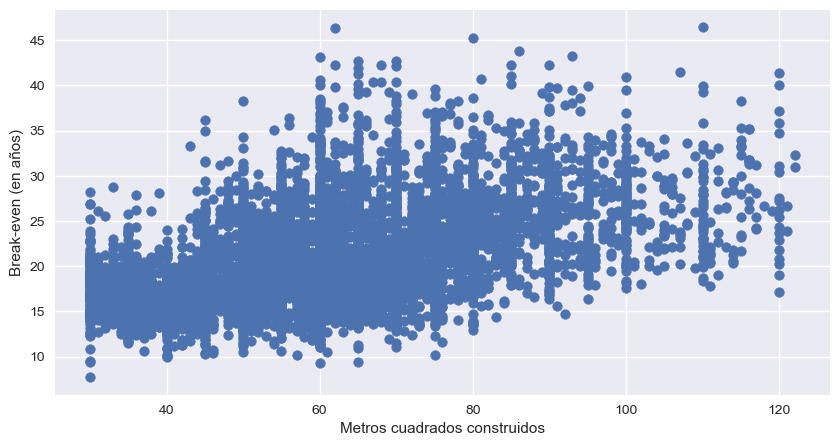

In [583]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.scatter(rent_pred_selling_price_breakeven_df['sq_meters_built'], rent_pred_selling_price_breakeven_df['break_even_years'])
plt.xlabel('Metros cuadrados construidos')
plt.ylabel('Break-even (en años)')
plt.show()

**Distancia al centro de la ciudad**

Una propiedad más cercana al centro de la ciudad puede ser más costosa de comprar, pero también podría tener una tasa de alquiler más alta, lo que podría afectar la métrica de break-even y ser más rentable. 

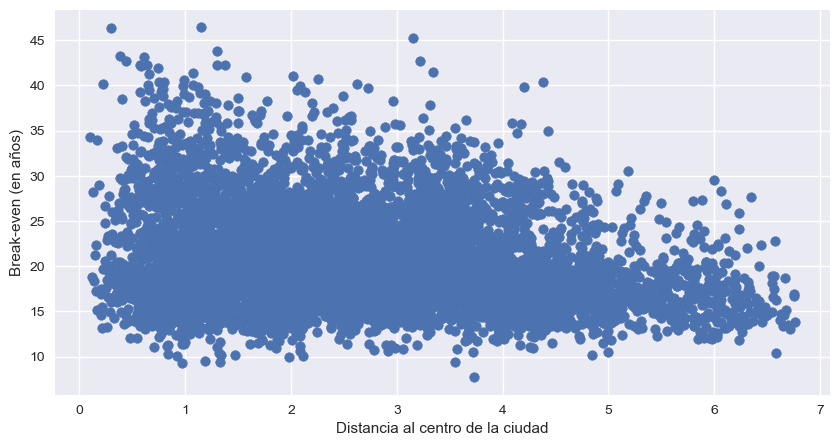

In [591]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.scatter(rent_pred_selling_price_breakeven_df['dist_city_center'], rent_pred_selling_price_breakeven_df['break_even_years'])
plt.xlabel('Distancia al centro de la ciudad')
plt.ylabel('Break-even (en años)')
plt.show()

**Baños por cada 100 metros cuadrados**

Un mayor número de baños por cada 100 metros cuadrados podría indicar un mayor valor de la propiedad y, por lo tanto, una mayor rentabilidad potencial. 

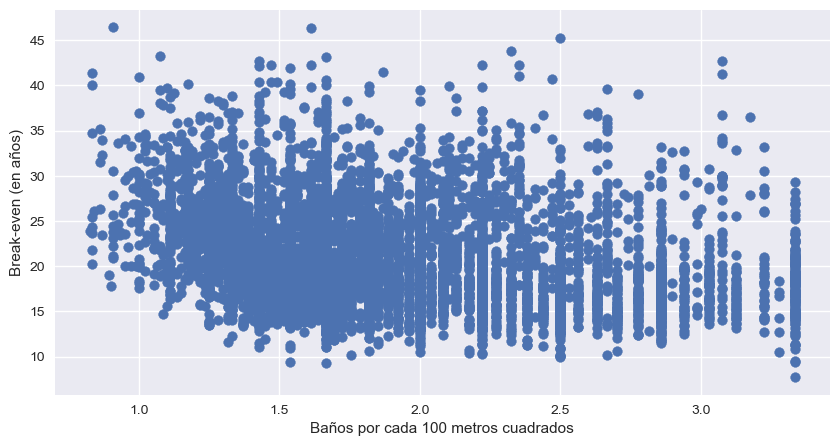

In [593]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.scatter(rent_pred_selling_price_breakeven_df['bathrooms_per_100_sqm'], rent_pred_selling_price_breakeven_df['break_even_years'])
plt.xlabel('Baños por cada 100 metros cuadrados')
plt.ylabel('Break-even (en años)')
plt.show()

**Tipo de propiedad**

Es posible que algunos tipos de propiedad sean más rentables que otros.

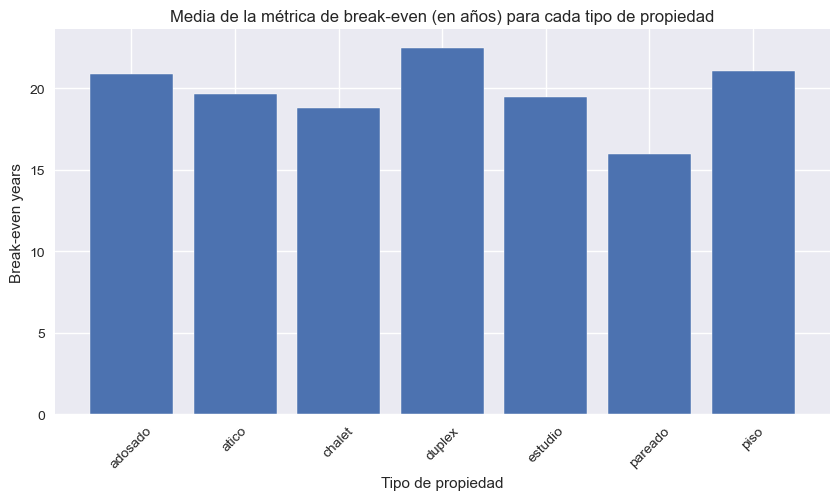

In [598]:
# Obtener una lista de las columnas de one hot encoding que representan los distintos tipos de propiedad
property_type_cols = [col for col in rent_pred_selling_price_breakeven_df.columns if col.startswith('property_type_')]

# Crear una nueva columna en el DataFrame que contenga el tipo de propiedad de cada fila
def get_property_type(row):
    for col in property_type_cols:
        if row[col] == 1:
            return col.split('_')[-1]
    return None

rent_pred_selling_price_breakeven_df['property_type'] = rent_pred_selling_price_breakeven_df.apply(get_property_type, axis=1)

# Agrupar el DataFrame por tipo de propiedad y calcular la media de la métrica de break-even para cada tipo de propiedad
property_type_means = rent_pred_selling_price_breakeven_df.groupby('property_type')['break_even_years'].mean()

# Graficar los resultados
fig, axs = plt.subplots(figsize=(10, 5))
plt.bar(property_type_means.index, property_type_means.values)
plt.xticks(rotation=45)
plt.title("Media de la métrica de break-even (en años) para cada tipo de propiedad")
plt.ylabel('Break-even years')
plt.xlabel('Tipo de propiedad')
plt.show()

- Observamos que el pareado es el que tiene la métrica break-even más baja, seguido del chalet y del ático. 
- La propiedad tipo pareado parece la opción más rentable para comprar y alquilar. La siguiente propiedad más rentable es chalet, seguida de estudio, ático, adosado, piso y dúplex.

**Aire acondicionado**

Podría ser que las viviendas con aire acondicionado sean más rentables.

In [602]:
ac_break_even = rent_pred_selling_price_breakeven_df.groupby('ac_1')['break_even'].mean()
print(ac_break_even)

ac_1
0.0    248.572044
1.0    253.220128
Name: break_even, dtype: float64


- Observamos que las viviendas con aire acondicionado tienen una métrica de break-even ligeramente mayor que las viviendas sin aire acondicionado.

- Por tanto, en promedio, las viviendas con aire acondicionado tardan ligeramente un poco más en recuperar la inversión inicial a través del alquiler en comparación con las viviendas sin aire acondicionado. 



**Piscina**

In [603]:
pool_break_even = rent_pred_selling_price_breakeven_df.groupby('pool_1')['break_even'].mean()
print(pool_break_even)

pool_1
0.0    250.646640
1.0    243.260668
Name: break_even, dtype: float64


- Observamos que las viviendas con piscina tienen una métrica de break-even ligeramente menor que las viviendas sin piscina.

- Por tanto, en promedio, las viviendas con piscina tardan ligeramente un poco menos en recuperar la inversión inicial a través del alquiler en comparación con las viviendas sin piscina. 


**Precio mediano por metro cuadrado por barrio.**

In [606]:
# ['Unknown', '0 - 11.5', '11.5 - 15','+15']

break_even_by_neighborhood = rent_pred_selling_price_breakeven_df.groupby('neighborhood_rent_index_cluster_encoded')['break_even'].mean()
print(break_even_by_neighborhood)

neighborhood_rent_index_cluster_encoded
1.0    212.411137
2.0    233.982943
3.0    278.173376
Name: break_even, dtype: float64


- Observamos que los barrios en la categoría 1 (con un precio mediano por metro cuadrado entre 0 y 11.5) tienen la métrica break-even media más baja, mientras que los barrios en la categoría 3 (con un precio mediano por metro cuadrado de más de 15) tienen la métrica break-even media más alta. Esto podría indicar que las propiedades en los barrios más económicos son más rentables para comprar y alquilar que las propiedades en los barrios más caros.

**Ubicación de la propiedad**

Creamos un mapa de calor que muestre la distribución de la métrica de break-even en función de la ubicación de la propiedad, utilizando la longitud y latitud.

In [613]:
import folium
from folium.plugins import HeatMap

# Creamos el mapa de calor
heat_map = folium.Map(location=[41.39, 2.15], zoom_start=12)

# Convertimos las coordenadas de latitud y longitud en una lista de tuplas
coordinates = list(zip(rent_pred_selling_price_breakeven_df['latitude'], 
                       rent_pred_selling_price_breakeven_df['longitude']))

# Creamos una lista de pesos a partir de la métrica de break-even
weights = rent_pred_selling_price_breakeven_df['break_even'].tolist()

# Creamos el mapa de calor con las coordenadas y pesos
HeatMap(coordinates, weights=weights, radius=15).add_to(heat_map)

# Mostramos el mapa de calor
heat_map


- Cada punto en el mapa representa una propiedad, y el color del punto indica la métrica de break-even. Los puntos más rojos indican una métrica de break-even más alta (viviendas menos rentables), mientras que los puntos más claros indican una métrica de break-even más baja (viviendas más rentables).

## Resultados finales, conclusiones y vías abiertas




En base al análisis realizado, podemos concluir que hemos implementado un modelo de bagging (BaggingRegressor) que nos permite predecir razonablemente bien (con un R2 en validación del 0.856) el precio de venta de una vivienda en Barcelona. Utilizando las predicciones de este modelo en el conjunto de datos de alquiler, hemos calculado el retorno de la inversión y hemos observado que parece que las propiedades más rentables para comprar y alquilar son aquellas de tamaño pequeño, tipo pareado y ubicadas en barrios económicos.

Sin embargo, hay algunas limitaciones a tener en cuenta en nuestro modelo. Primero, debemos tener en cuenta que el modelo solo puede predecir los precios de venta basados en la información disponible en el dataset de venta. Si se producen cambios significativos en el mercado inmobiliario, estos cambios no se tendrán en cuenta en nuestro modelo. Además, nuestro modelo no tiene en cuenta otros factores que pueden afectar la rentabilidad de una inversión inmobiliaria, como los costos de mantenimiento y reparación.

En cuanto a las vías abiertas, podemos considerar varias opciones para mejorar nuestro modelo. En primer lugar, podríamos ampliar nuestro conjunto de datos con información adicional, como su proximidad a lugares de interés como tiendas, escuelas y transporte público. Además, podríamos utilizar técnicas de aprendizaje automático avanzadas, como redes neuronales, para mejorar aún más nuestra capacidad para predecir los precios de venta de las propiedades.

Nuestro modelo podría ser utilizado por inversores inmobiliarios o personas interesadas en evaluar la rentabilidad de una inversión en una propiedad determinada. Eso sí, teniendo en cuenta que los resultados de nuestro modelo deben ser considerados junto con otros factores relevantes antes de tomar una decisión de inversión.

En conclusión, hemos desarrollado un modelo de machine learning que puede ayudarnos a predecir el precio de venta de una propiedad en Barcelona, y hemos utilizado este modelo para evaluar la rentabilidad de una inversión inmobiliaria. Si bien nuestro modelo tiene limitaciones, predice razonablemente bien el precio de venta de las viviendas y podría ser una herramienta útil para los interesados. En el futuro, se podría considerar la incorporación de información adicional para mejorar aún más nuestra capacidad para predecir los precios de venta de las propiedades en la ciudad de Barcelona. 

